Found 1187 images belonging to 2 classes.
Found 254 images belonging to 2 classes.


D:\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10


D:\anaconda\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


37/37 ━━━━━━━━━━━━━━━━━━━━ 49s 1s/step - accuracy: 0.5369 - loss: 0.8094 - val_accuracy: 0.8482 - val_loss: 0.3410
Epoch 2/10
 1/37 ━━━━━━━━━━━━━━━━━━━━ 5s 147ms/step - accuracy: 0.8750 - loss: 0.4117

D:\anaconda\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.8750 - loss: 0.4117 - val_accuracy: 1.0000 - val_loss: 0.2082
Epoch 3/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 31s 721ms/step - accuracy: 0.8017 - loss: 0.3941 - val_accuracy: 0.8795 - val_loss: 0.2341
Epoch 4/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.9375 - loss: 0.2195 - val_accuracy: 0.9667 - val_loss: 0.1282
Epoch 5/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 681ms/step - accuracy: 0.9022 - loss: 0.2471 - val_accuracy: 0.9509 - val_loss: 0.1130
Epoch 6/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.9688 - loss: 0.1820 - val_accuracy: 0.8667 - val_loss: 0.1638
Epoch 7/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 650ms/step - accuracy: 0.9518 - loss: 0.1460 - val_accuracy: 0.9598 - val_loss: 0.1022
Epoch 8/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.9688 - loss: 0.1052 - val_accuracy: 0.9333 - val_loss: 0.1722
Epoch 9/10
37/37 ━━━━━━━━━━━━━━━━━━━━ 28s 645ms/step - accuracy: 0.9280 - loss: 0.1983 - val_accuracy: 0.8929 - val_

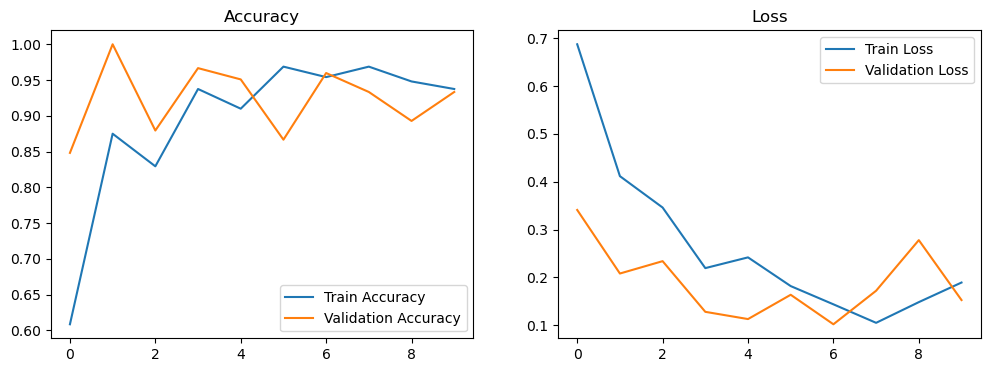

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# 1. Data Preparation
# Set up paths for training and validation data
train_dir = 'C:/Users/prath/Downloads/archive (1)/train-20240626T051434Z-001/train'  # Replace with your training data path
val_dir = 'C:/Users/prath/Downloads/archive (1)/test-20240626T051512Z-001/test'      # Replace with your validation data path
img_size = (128, 128)
batch_size = 32

# Data Augmentation for training
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# Validation data does not need augmentation
val_datagen = ImageDataGenerator(rescale=1./255)

# Load and prepare data
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_data = val_datagen.flow_from_directory(
    val_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='binary'
)

# 2. Model Creation
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(128, 128, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# 3. Compile the Model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 4. Train the Model
history = model.fit(
    train_data,
    steps_per_epoch=train_data.samples // batch_size,
    validation_data=val_data,
    validation_steps=val_data.samples // batch_size,
    epochs=10
)

# 5. Evaluate the Model
val_data.reset()
y_pred = (model.predict(val_data) > 0.5).astype("int32")
y_true = val_data.classes

# Generate a classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=['Non-defective', 'Defective']))

# Confusion Matrix
conf_matrix = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Plot training & validation accuracy and loss values
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Loss')
plt.show()
